In [ ]:
from neuralprophet import NeuralProphet
import pandas as pd
import os

In [ ]:
def plot_forecast(model, data, periods, historic_pred=True, highlight_steps_ahead=None):
  
    """ plot_forecast function - generates and plots the forecasts for a NeuralProphet model
    - model -> a trained NeuralProphet model
    - data -> the dataframe used for training
    - periods -> the number of periods to forecast
    - historic_pred -> a flag indicating whether or not to plot the model's predictions on historic data
    - highlight_steps_ahead -> the number of steps ahead of the forecast line to highlight, used for autoregressive models only"""
    
    future = model.make_future_dataframe(data, 
                                         periods=periods, 
                                         n_historic_predictions=historic_pred)
    forecast = model.predict(future)
    
    if highlight_steps_ahead is not None:
        model = model.highlight_nth_step_ahead_of_each_forecast(highlight_steps_ahead)
        model.plot_last_forecast(forecast)
    else:    
        model.plot(forecast)

In [ ]:
import yfinance as yf
# set start and end dates
start_date = '2000-03-08'
end_date = '2021-08-17'

ticker_symbol = 'SPY'

df = yf.download(ticker_symbol, start_date, end_date)

df.to_csv(ticker_symbol + ".csv")

df = pd.read_csv(ticker_symbol + ".csv")

os.remove(ticker_symbol + ".csv")

In [ ]:
df = df.rename(columns={"Date": "ds"})
df = df.rename(columns={"Close": "y"})
df = df[['ds', 'y']]

In [ ]:
m = NeuralProphet(
    n_forecasts=60,
    n_lags=60,
    n_changepoints=100,
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=True,
    batch_size=64,
    epochs=100,
    learning_rate=0.01,
)
m = m.add_country_holidays("US", mode="additive", lower_window=-1, upper_window=1)

metrics = m.fit(df, freq="D")

INFO - (NP.forecaster._handle_missing_data) - 2437 missing dates added.
INFO - (NP.forecaster._handle_missing_data) - 2437 NaN values in column y were auto-imputed.


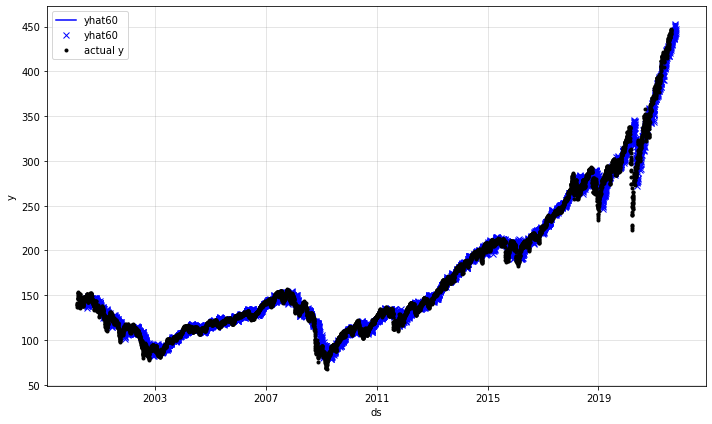

In [9]:
plot_forecast(m, df, periods=60)

INFO - (NP.forecaster._handle_missing_data) - 28 missing dates added.
INFO - (NP.forecaster._handle_missing_data) - 28 NaN values in column y were auto-imputed.


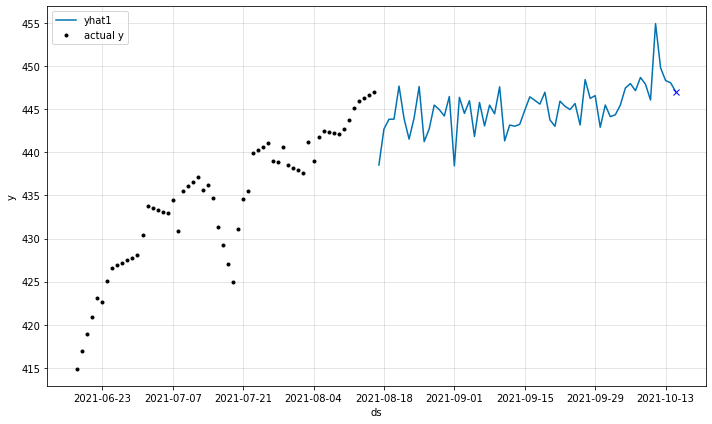

In [10]:
plot_forecast(m, df, periods=60, historic_pred=False, highlight_steps_ahead=60)

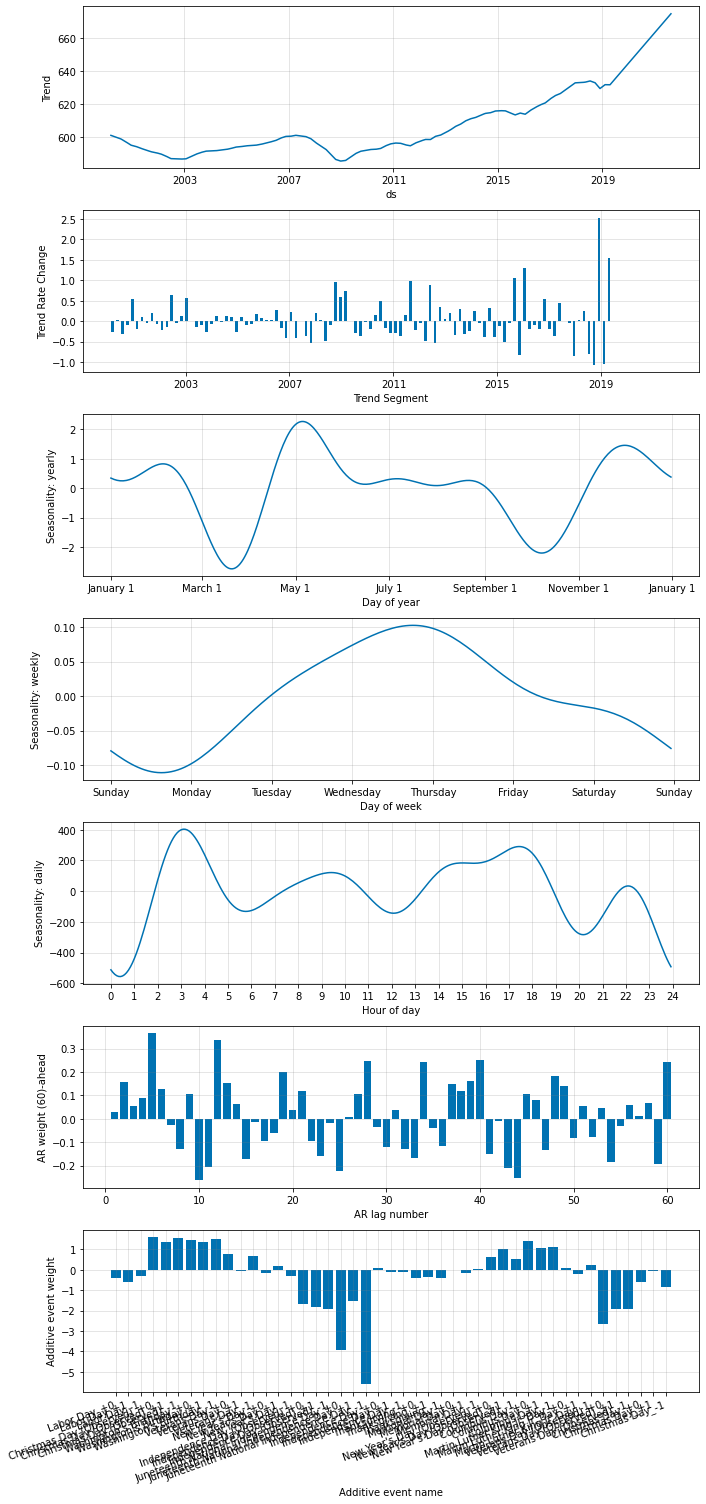

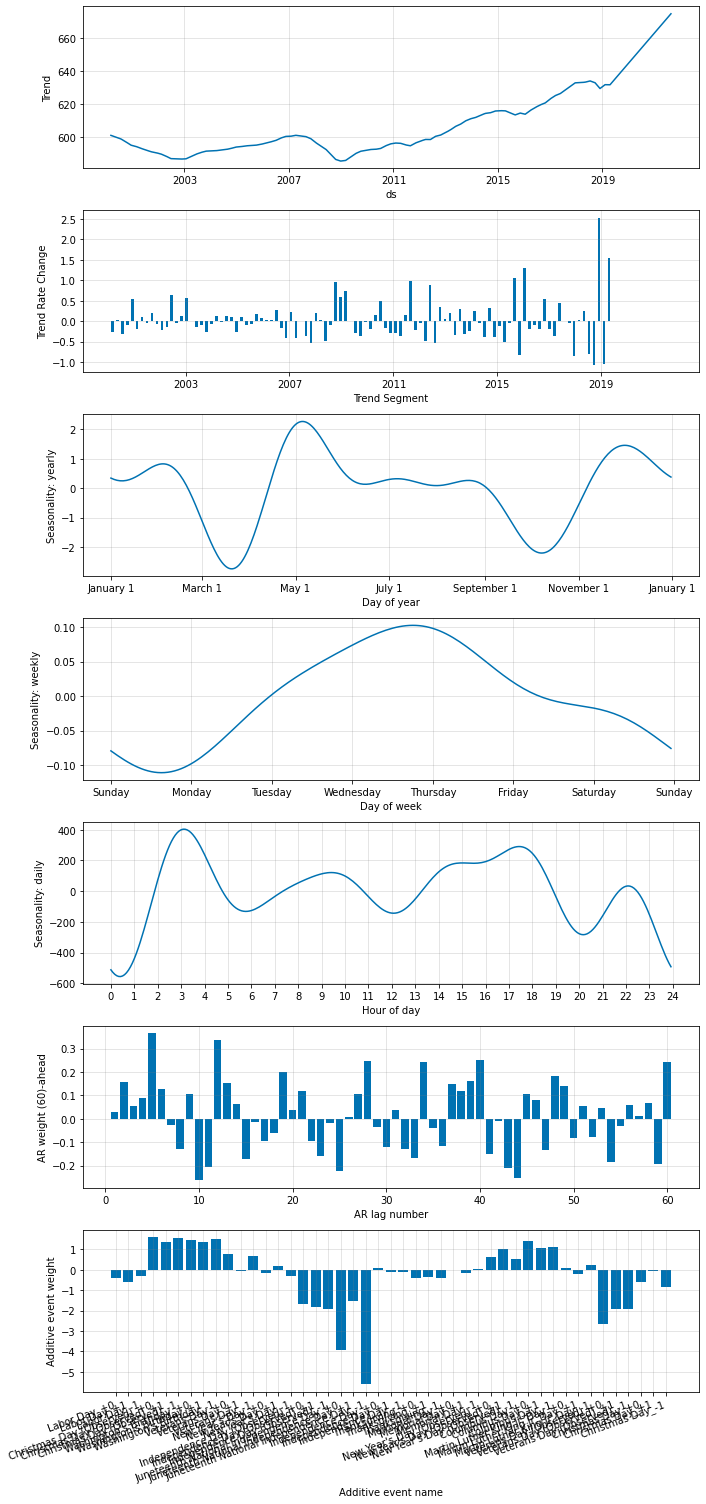

In [11]:
m.plot_parameters()